In [15]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT,RIGHT_ONLY

In [16]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v1')
print(env.action_space)
env = JoypadSpace(env, SIMPLE_MOVEMENT)

c:\Dissertation\dissertation\lib\site-packages\gym\envs\registration.py:594: UserWarning: WARN: The environment SuperMarioBros-v1 is out of date. You should consider upgrading to version `v3`.
  f"The environment {id} is out of date. You should consider "


Discrete(256)


In [17]:
#Simplifies movements 
print(SIMPLE_MOVEMENT)
print(COMPLEX_MOVEMENT)
print(RIGHT_ONLY)

#With env = JoypadSpace(env, SIMPLE_MOVEMENT) 256 action space
#Simple movement 7 action space
#Allows environment to be easier
env.action_space

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]
[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left'], ['left', 'A'], ['left', 'B'], ['left', 'A', 'B'], ['down'], ['up']]
[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B']]


Discrete(7)

In [18]:
#Single frame of 240 pixels by 256 pixels with 3 color range (RBG)
env.observation_space.shape

(240, 256, 3)

In [19]:
#Performs random action from action space
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A']

In [20]:
# Create a flag - restart or not
#done = True
# Loop through each frame in the game
#for step in range(1000): 
    # Start the game to begin with 
#    if done: 
        # Start the game
#        env.reset()
    # Do random actions
#    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
#    env.render()
# Close the game
#env.close()

In [21]:
#If the environment stops but keeps running
#env.close()

In [22]:
env.reset()
#print(env.step(1)[0]) #returns State

#print(env.step(1)[1]) #returns Reward

#print(env.step(1)[2]) #returns game state as bool

#print(env.step(1)[3]) #returns info about game

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

<h1>Preprocessing</h1>

In [23]:
#Install Pytorch
#%pip install torch torchvision torchaudio

In [24]:
#Install stablebaseline
#%pip install stable-baselines3[extra]

In [25]:
#%pip install stable-baselines3[extra]
#%pip install stable-baselines3==1.2.0
#%pip uninstall stable-baselines3

In [26]:
#Wrappers to frame stack and convert to greyscale
from gym.wrappers import GrayScaleObservation
#Vectorisation Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#Matplotlib to see frame stacking
from matplotlib import pyplot as plt

(-0.5, 255.5, 239.5, -0.5)

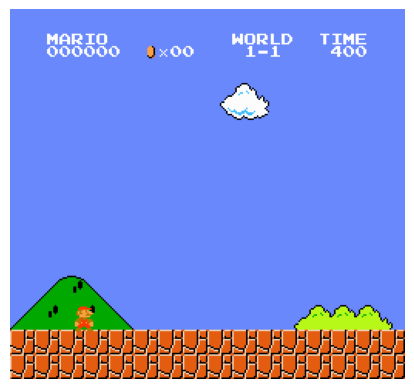

In [27]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
state = env.reset()
state.shape
plt.imshow(state)
plt.axis('off')

In [28]:
#Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
#Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)

#Grayscale
env = GrayScaleObservation(env, keep_dim=True)
    #keep_dim = true saves the last channel from being removed
    #(240, 256, 1)

    #Without keep_dim
    #env = GrayScaleObservation(env)
    #(240, 256)

In [29]:
#Grayscale transforms state from (240, 256, 3) -> (240, 256, 1)
state = env.reset()
state.shape

(240, 256, 1)

(-0.5, 255.5, 239.5, -0.5)

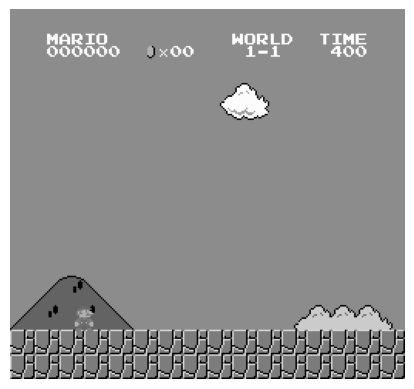

In [30]:
#Showing Game frame
plt.imshow(state,cmap='gray',vmin=0,vmax=256)
plt.axis('off')

In [31]:
print("Pixels with 3 Color Chanels:",240*256*3)
print("Pixels with 1 Color Chanel:",240*256*1)

#Grayscaling reduced the amount of pixels to process to make learning faster

Pixels with 3 Color Chanels: 184320
Pixels with 1 Color Chanel: 61440


In [32]:
#Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

In [33]:
state = env.reset()
state.shape

(1, 240, 256, 1)

In [34]:
#Check stablebaseline version
import stable_baselines3

print(stable_baselines3.__version__)

1.7.0


In [62]:
state,reward,done,info = env.step([env.action_space.sample()])

In [64]:
#Frame Stack
#satcking 4 frames together
env = VecFrameStack(env,4,channels_order='last')
print(state.shape)

print(env.observation_space.shape)
#returns (1, 240, 256, 4)
#4 chanels at the end, one for each frame

(1, 240, 256, 64)
(240, 256, 256)


ValueError: num must be 1 <= num <= 4, not 5

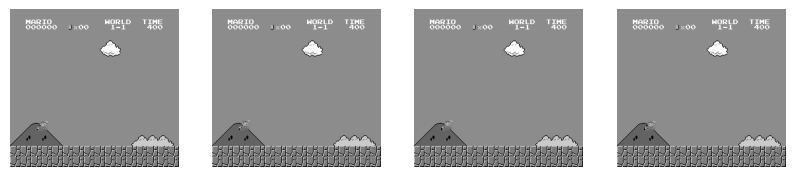

In [65]:
#Showing stacked frames
plt.figure(figsize=(10,8))
for x in range(state.shape[3]):
    plt.subplot(1,4,x+1)
    plt.imshow(state[0][:,:,x],cmap='gray',vmin=0,vmax=256)
    plt.axis('off')
plt.show()

In [68]:
for step in range(5000):
    env.render()


<h1>Training</h1>

In [11]:
#Import Os for file path management
import os

#Import PPO for algos
from stable_baselines3 import PPO
from stable_baselines3 import DQN

#Import base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

c:\Dissertation\dissertation\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Dissertation\dissertation\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__


In [14]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [15]:
CHECKPOINT_DIR = './train'
LOG_DIR = './logs'

In [16]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [18]:
#This is the AI Model Started
#Using CNN neural network to solve policy
#Learning rate, can be set smaller which will take longer, set  larger will learn quickly but not good
#n_steps how number of steps in an environment before update neural network
model = PPO('CnnPolicy',env,verbose=1,tensorboard_log=LOG_DIR,learning_rate=0.000001,n_steps=512)

#modelDQN = DQN('CnnPolicy',env,verbose=1,tensorboard_log=LOG_DIR,learning_rate=0.000001,n_steps=512)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [ ]:
#Trainin of the AI model, this is where the learnin takes place,
#total_timesteps=10000 how many frames the Ai will see
model.learn(total_timesteps=10000,callback=callback)

Logging to ./logs\PPO_1


c:\Dissertation\dissertation\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 56  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 9             |
|    iterations           | 2             |
|    time_elapsed         | 105           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.3341196e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00465       |
|    learning_rate        | 1e-06         |
|    loss                 | 188           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000133     |
|    value_loss           | 419           |
-------------------------------------------
-----

In [ ]:
#Instead of using callback, to save manually
#model.save('MODEL_NAME')

<h1>Testing</h1>

In [ ]:
#Loading Model
model.load('./train/best_model_10000')

In [ ]:
state = env.reset()

In [ ]:
model.predict(state)

(array([3], dtype=int64), None)

In [ ]:
#Runs the model, using render to view
state = env.reset()

#Predicts the best action at the given state
while True:
    action,state  = model.predict(state)
    state, reward,done,info = env.step(action)
    env.render()

In [ ]:
#To imporve 
#Train for longer with slower learning rate
#Multiprocessing
#Try different algorithm